<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/M3_AST_06_Boosting_Stacking_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 6: Boosting and Stacking

## Learning Objectives

At the end of the experiment, you will be able to

- understand various boosting methods
- implement AdaBoost, Gradient Boosting and Extreme Gradient Boosting
- implement stacking algorithm

In [ ]:
#@title Walkthrough Video
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.chn.talentsprint.com/content/Boosting_and_Stacking_walkthrough.mp4">
</video>""")

### Boosting

Boosting is a general ensemble method that creates a strong model from a number of weak learners.

This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.

There  are  many  boosting  methods  available,  but  by  far  the  most  popular  are AdaBoost (short  for  Adaptive  Boosting)  and  Gradient  Boosting.

#### AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors  focusing  more  and  more  on  the  hard  cases.  This  is  the  technique  used  by  AdaBoost. For example, to build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of  misclassified  training  instances  is  then  increased.  A  second  classifier  is  trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on

![Image](https://i.ibb.co/GTKtnG0/Boost.jpg)

Figure 1: AdaBoost sequential training with instance weight updates

#### Gradient Boosting

Gradient boosting is known to be one of the leading ensemble algorithms. Gradient boosting algorithm uses gradient descent method to optimize the loss function.

Just  like  AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration just like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

A simpler way to train the gradient boosting regression trees ensemble technique is to use Scikit-Learn’s Gradient Boosting Regressor class. Much like the Random Forest Regressor class, it has hyperparameters to control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, and so on), as  well  as  hyperparameters  to  control  the  ensemble  training,  such  as  the  number  of trees (n_estimators).

##### How boosting is accomplished?

- Iteratively learning a set of weak models on subsets of the data
- Weighting each weak prediction according to each weak learner's performance
- Combine the weighted predictions to obtain a single weighted prediction
- that is much better than the individual predictions themselves!


Here is a list of essential components required by Gradient Boosting Algorithms:

**Additive Model**

We try to minimize losses by implementing more decision trees.  We can also diminish the error rates by minimizing the parameters. In cases like these, we create the model to ensure there are no changes to the existing tree despite the addition of another one.

**Weak Learner**

Weak learners are an essential part of gradient boosting for making predictions. We utilize regression trees to extract authentic values. It is essential to develop trees greedily to arrive at the most favorable split point. It is a significant reason why the model mostly overfits the specific dataset.

**Loss Function**

We must optimize loss functions to reduce prediction-related errors. Contrary to Ada Boost, the wrong result does not receive an increased weight in gradient boosting. Instead, it minimizes the loss function from weak learners by obtaining output averages.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2305526" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9284795301" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M3_AST_06_Boosting_Stacking_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/indian_liver_patient.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import support vector regressor algorithm
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Import modelling methods
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
# Import the model performance evaluation metrics
from sklearn import metrics
# Import Adaboost, Gradient Boost, Random Forest and Stacking algorithm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import fetch_california_housing  # to import california housing dataset
# to visualize decision boundaries
import graphviz
import xgboost as xgb
from xgboost import XGBRegressor

#### Define the AdaBoost classifier

Let’s take a closer look at the AdaBoost algorithm. Each instance weight $w^{(i)}$ is initially set to $\frac{1}{m}$. A first predictor is trained and its weighted error rate $r_1$ is computed on the training set

*Equation 1: Weighted error rate of the $j^{th}$ predictor*

$r_j =$ $\frac {\underset{\hat y_j^i \neq y^i}{\sum_{i=1}^{m} w^i}}{\sum_{i=1}^{m} w^i}$

where $\hat{y_j^i}$ is  the $j^{th}$ predictor’s  prediction  for  the $i^{th}$ instance.

The predictor’s weight $α_j$ is then computed using Equation 2, where $η$ is the learning  rate  hyperparameter. The  more  accurate  the  predictor  is,  the higher its weight will be. If it is just guessing randomly, then its weight will be close to zero.  However,  if  it  is  most  often  wrong  (i.e.,  less  accurate  than  random  guessing), then its weight will be negative.

*Equation 2: Predictor weight*

$\alpha_j =$ $\eta \log \frac{1-r_j}{r_J}$

Next, the instance weights are updated using Equation 3: the misclassified instances are boosted.

*Equation 3: Weight update rule*

for $i= 1, 2,⋯,m$

\begin{align}
w^{(i)} \leftarrow \left\{ \begin{array}{cc}
                w^{(i)} & \hspace{5mm} if \hspace{2.5mm} \hat y_j^{(i)} = y^{(i)} \\
                w^{(i)} \exp(a_j) & \hspace{5mm} if \hspace{2.5mm} \hat y_j^{(i)} \neq y^{(i)}  \\
                \end{array} \right.
\end{align}

Then all the instance weights are normalized (i.e., divided by $∑_{i=1}^{m} w_i$).

Finally, a new predictor is trained using the updated weights, and the whole process is repeated  (the  new  predictor’s  weight  is  computed,  the  instance  weights  are  updated, then  another  predictor  is  trained,  and  so  on).  The  algorithm  stops  when  the  desired number of predictors is reached, or when a perfect predictor is found. To make predictions, AdaBoost simply computes the predictions of all the predictors and  weighs  them  using  the  predictor  weights  $α_j$.  The  predicted  class  is  the  one  that receives the majority of weighted votes (see Equation 4).

*Equation 4: AdaBoost predictions*

$\hat y(X) = \underset{k}{\operatorname{argmax}} \underset{\hat y_j(X) = k}{\operatorname{\sum_{j=1}^{N} \alpha_j}} \hspace{1cm}$ Where $N$ is the number of predictors.

In the following exercises, we will use the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset. The task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age, and gender. We will be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, we will be using the ROC AUC score as a metric instead of accuracy.

As a first step, we will start by instantiating an AdaBoost classifier.

In [5]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Preprocessing

In [6]:
# Check for missing values
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [7]:
# Drop missing values
df1 = df.dropna()
df1.isnull().any()

,0
Age,False
Gender,False
Total_Bilirubin,False
Direct_Bilirubin,False
Alkaline_Phosphotase,False
Alamine_Aminotransferase,False
Aspartate_Aminotransferase,False
Total_Protiens,False
Albumin,False
Albumin_and_Globulin_Ratio,False


Now, we plot a correlation matrix and see how the attributes are correlated to each other.


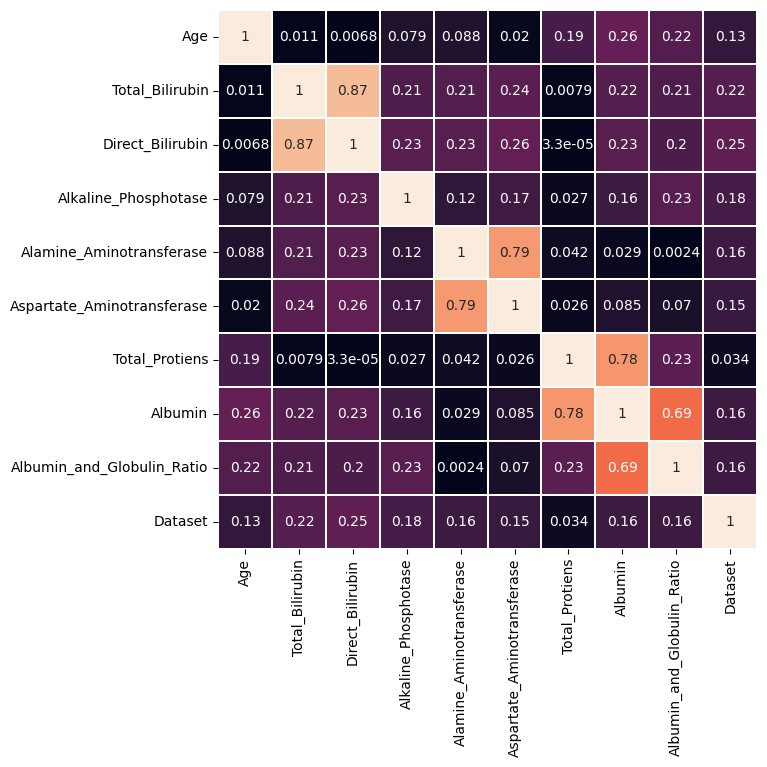

In [8]:
# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(7,7))
numeric_df1 = df1.select_dtypes(include='number')
sns.heatmap(abs(numeric_df1.corr()), annot=True, square=True, cbar=False, ax=ax, linewidths=0.25);

In [9]:
# Drop correlated features
df2 = df1.drop(columns= ['Direct_Bilirubin', 'Alamine_Aminotransferase', 'Total_Protiens'])

As we can see there is a correlation between

- *Total_Bilirubin* and *Direct_Bilirubin*

- *Alamine_Aminotransferase* and ^Aspartate_Aminotransferase*

- *Total_Protiens* and *Albumin*

The features we drop from data are: *Direct_Bilirubin*, *Alamine_Aminotransferase* and *Total_Protiens*.

There is only one column *Gender* of categorical type and remaining below are continuous data.

- Age
- Total_Bilirubin
- Alkaline_Phosphotase
- Aspartate_Aminotransferase
- Albumin
- Albumin_and_Globulin_Ratio



In [10]:
df2['Dataset'] = df2['Dataset'].replace(1,0)
df2['Dataset'] = df2['Dataset'].replace(2,1)

Now, we will segregate the disease according to gender and total people who participated in this study.

In [11]:
print('How many people have disease:', '\n', df2.groupby('Gender')[['Dataset']].sum(), '\n')
print('How many people participated in the study:', '\n', df2.groupby('Gender')[['Dataset']].count())

How many people have disease: 
         Dataset
Gender         
Female       49
Male        116 

How many people participated in the study: 
         Dataset
Gender         
Female      140
Male        439


Now, we will see the percentage of male and female having disease.

In [12]:
print('Percentage of people with the disease depending on gender:')
df2.groupby('Gender')[['Dataset']].sum()/ df2.groupby('Gender')[['Dataset']].count()

Percentage of people with the disease depending on gender:


,Dataset
Gender,
Female,0.350000
Male,0.264237


Women have a higher percentage of the disease, so we will conduct a separate study, depending on the gender of the person.

In [13]:
# defining the X and y variables
X = df2[['Gender', 'Total_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']]
y = pd.Series(df2['Dataset'])

We will apply label encoding for categorical data (Gender).

In [14]:
labelencoder = LabelEncoder()
X['Gender'] = labelencoder.fit_transform(X['Gender'])

Now, we will split the data into training and testing datasets. After, that we scale the data.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

**Train the model Using AdaBoost Classifier**

In [16]:
ADB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         n_estimators=125,
                         learning_rate = 0.6,
                         random_state=42)

ADB.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

In [17]:
# calculating model evaluation metrics using cross_val_score like accuracy, R2 score, etc.
n_scores = cross_val_score(ADB, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
('Accuracy: %.3f' % (np.mean(n_scores)*100))

'Accuracy: 69.538'

#### Create a Confusion Matrix

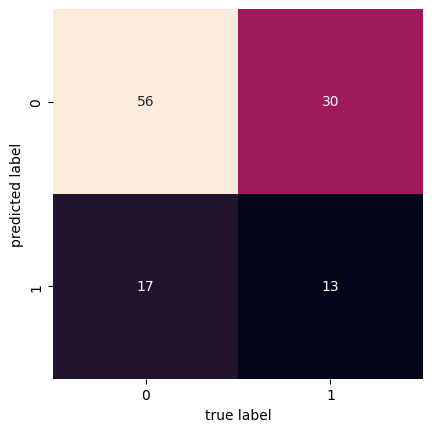

In [18]:
labels = ADB.predict(X_test)
matrix = metrics.confusion_matrix(y_test, labels)
# creating a heat map to visualize confusion matrix
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

From the above plot of the confusion matrix, we can say that the AdaBoost classifier model predicts 56 'no disease' and 13 'with disease' values correctly.

Now, we plot ROC and AUC curve for the predictions.

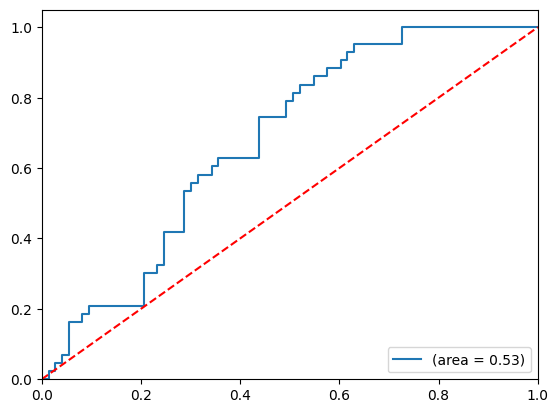

In [19]:
logit_roc_auc = metrics.roc_auc_score(y_test, labels)
fpr, tpr, thresholds = metrics.roc_curve(y_test, ADB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

So, we get an Area under the curve value (AUC) of 0.53.

When we need to check or visualize the performance of the multi-class classification problem, we use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance.

To know more about AUC-ROC, click [here](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc).

#### Gradient Boosting Implementation

We use California house-price dataset as a regression dataset in this example. After loading the dataset, first, we will separate data into x and y parts.

In [20]:
california = fetch_california_housing()
print(california.keys())
print("shape of dataset",california.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
shape of dataset (20640, 8)


As we can see it returned (20640, 8), that means there are 20640 rows of data with 8 columns. Now, if we want to know what the 8 columns are, we can simply use the `.feature_names` attribute and it will return the feature names.

In [21]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Now let’s convert it into a pandas DataFrame.

In [22]:
df = pd.DataFrame(california.data)
df.columns = california.feature_names

Explore the top 5 rows of the dataset by using head() method.

In [23]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Here, we will notice that there is no column called `PRICE` in the DataFrame. This is because the target column is available in another attribute called `california.target`. Append `california.target` to the pandas DataFrame.

In [24]:
df['PRICE'] = california.target

Now, we will run the `.info()` method on our DataFrame to get useful information about the data.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Separate the target variable and rest of the variables using .iloc to subset the data.

In [26]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [27]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, random_state=12, test_size=0.15)

Defining the model

We can define the model with its default parameters or set the new parameter values.


In [28]:
# with new parameters
gbr1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', n_estimators=600,
    max_depth=5,
    learning_rate=0.01,
    min_samples_split=4)
# with default parameters
gbr = GradientBoostingRegressor()

Fit the model with default parameters and predict the data

In [29]:
# fit with default parameters
gbr.fit(xtrain, ytrain)

ypred = gbr.predict(xtest)

# calculating Mean Squared Error
mse = metrics.mean_squared_error(ytest,ypred)
# mse for default model
print("MSE: %.2f" % mse)

MSE: 0.27


Fit the model by passing parameters and predict the data

In [30]:
# fit by passing hyperparameters
gbr1.fit(xtrain, ytrain)

ypred1 = gbr1.predict(xtest)
# calculating Mean Squared Error
mse1 = metrics.mean_squared_error(ytest, ypred1)

# mse for regularized model
print("MSE: %.2f" % mse1)

MSE: 0.24


Finally, we will visualize the actual and predicted values in a plot for both models.

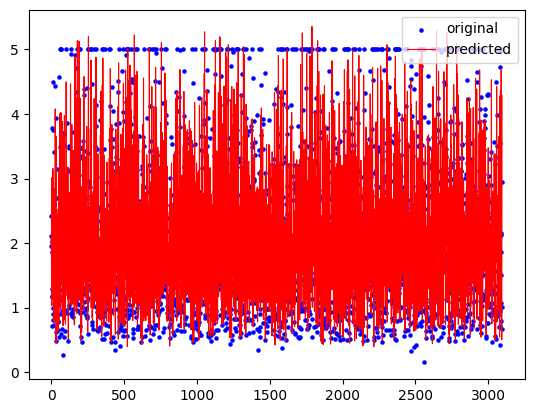

In [31]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

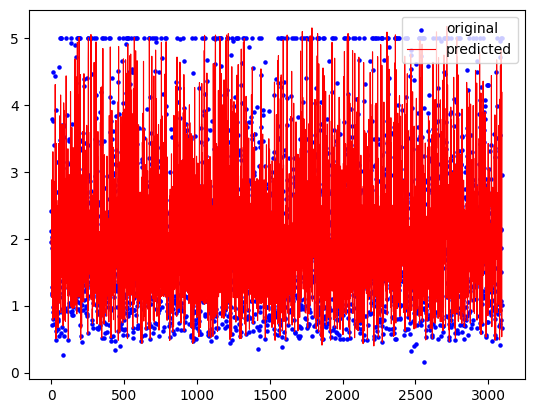

In [32]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred1, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

From the above plots, we can see that the mean square error is less for the regularized model than the default model.

#### Implementation of XGBoost

An optimized implementation of Gradient Boosting is available in the popular python library `XGBoost`, which stands for Extreme Gradient Boosting. This package aims at being extremely fast, scalable, and  portable.  In  fact,  XGBoost  is  often  an  important  component  of winning entries in ML competitions. XGBoost’s API is quite similar to Scikit-Learn’s:

Here, we also going to import the California Housing dataset and store it in a variable called california.

The next step is to instantiate an `XGBoost regressor` object by calling the `XGBRegressor()` class from the `XGBoost` library with the hyper-parameters passed as arguments. For classification problems, we would have used the `XGBClassifier()` class.

In [33]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                           max_depth = 5, alpha = 10, n_estimators = 10)

Now, we will create the train and test set for cross-validation of the results using the `train_test_split` function from sklearn's `model_selection` module with `test_size` size equal to 20% of the data. Also, to maintain the reproducibility of the results, a random_state is also assigned.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
xgb_reg.fit(X_train,y_train)

y_pred = xgb_reg.predict(X_test)

In [36]:
mse2 = metrics.mean_squared_error(y_test, y_pred)
print("MSE: %f" % (mse))

MSE: 0.270432


Plotting the `feature importance` graph with the matplotlib library:

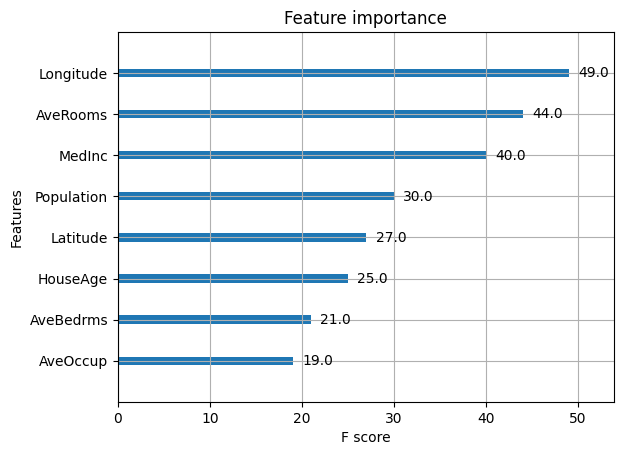

In [37]:
xgb.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

As we can see the feature `MedInc` and `AveRooms` have been given the highest importance score among all the features. Thus XGBoost also gives us a way to do Feature Selection.

To know more about XGboost, click [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_AST_06_Boosting_Stacking_XGBoost.pdf).

### Stacking  (Optional)

The overall idea of the stacking ensemble method is to train several models with different algorithm types (i.e. base-learners), on the train data, and then aggregate all the models using another model (meta learner), to make the final prediction. The inputs for the meta-learner are the prediction outputs of the base-learners.

![Image](https://miro.medium.com/max/2078/1*Hyd8g0mdXeTAqwt-Ghak3w.png)

Figure 2: Predictions in a multilayer stacking ensemble

For a given input data point, we pass it through the M base-learners and get M number of predictions, and send those M predictions through the meta-learner as inputs and obtain the final prediction.

Here, we again look at the California housing dataset and try to build a regressor model using the stacking method.

**Stacking Models**

We assume no hyperparameters for the stacking – this means that we use the predefined hyperparameters for each model.

In [38]:
xgb = XGBRegressor()
rf = RandomForestRegressor(n_estimators=400, max_depth=5, max_features=6)
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='rbf')

Now that we have defined all our models, we can begin improving our results by stacking some models. As we can see here, we defined two levels, where the first level has 5 models, and the second level has the meta-learner.

In [39]:
estimators = [('ridge', ridge), ('svr', svr), ('rf', rf), ('lasso', lasso)]
reg = StackingRegressor(estimators=estimators,final_estimator=xgb)
# fit the model
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [40]:
score = metrics.r2_score(y_test, pred)
print(score)

0.722735339635953


### Theory Questions

1. If  your  AdaBoost  ensemble  underfits  the  training  data,  what  hyperparameters should you tweak and how?

 If your AdaBoost ensemble underfits the training data, you can try increasing the number of estimators or reducing the regularization hyperparameters of the base estimator. You may also try slightly increasing the learning rate.

2. If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

 If your Gradient Boosting ensemble overfits the training set, you should try decreasing the learning rate. You could also use early stopping to find the right number of predictors (you probably have too many).

### Please answer the questions below to complete the experiment:




In [41]:
#@title Select the False Statement: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "XGBoost is a scalable and accurate implementation of the adaptive boosting technique" #@param ["", "Gradient boosting re-defines boosting as a numerical optimisation problem where the objective is to minimize the loss function of the model by adding weak learners using gradient descent", "In Gradient Boosting sequential predictors are trained on the residuals of the previous predictor", "XGBoost is a scalable and accurate implementation of the adaptive boosting technique"]

In [43]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Was Tough, but I did it" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [44]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "details of each model" #@param {type:"string"}


In [45]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [46]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [47]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [48]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3749
Date of submission:  08 Aug 2024
Time of submission:  00:15:43
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
